<a href="https://colab.research.google.com/github/JCRODRIGU/JCR_PORTFOLIO/blob/main/RFM_CASO_PRACTICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
!pip install dataprep -U
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.5 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1268255 sha256=3bd70fcb043010dcf05327b6139dd8817949426986fc101a840c40bdb20a8216
  Stored in directory: /root/

In [4]:
link = 'https://drive.google.com/file/d/=1W1gjRvhv38hwnNJe7v3cQc5mFkP7c4ju' # The shareable link

In [5]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1W1gjRvhv38hwnNJe7v3cQc5mFkP7c4ju


In [6]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

In [7]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('practice_case.csv')
data = pd.read_csv('practice_case.csv')
# Dataset is now stored in a Pandas Dataframe

In [8]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
Rtl_data = data
Rtl_data.head()

,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,number of logins variation,service use variation,customer benefit variation,days since last connection variation
0,0,921,46,0,386,0,0.00,62,8,294,-1
1,1,151,26,0,0,0,0.00,4,0,-8,31
2,2,1650,10,0,282,8,2.75,262,2,0,-1
3,3,1481,12,0,158,0,0.00,-2,2,1174,1
4,4,200,12,0,240,0,0.00,52,0,18,10


In [10]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(2000, 11)

## RFM Modelling

In [11]:
#Create RFM Modelling scores for each customer
RFMScores = Rtl_data

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'days since last connection variation': 'Recency',
                         'number of logins variation': 'Frequency',
                         'customer benefit variation': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,index,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,Frequency,service use variation,Monetary,Recency
0,0,0,921,46,0,386,0,0.00,62,8,294,-1
1,1,1,151,26,0,0,0,0.00,4,0,-8,31
2,2,2,1650,10,0,282,8,2.75,262,2,0,-1
3,3,3,1481,12,0,158,0,0.00,-2,2,1174,1
4,4,4,200,12,0,240,0,0.00,52,0,18,10


In [12]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    2000.000000
mean        1.427500
std        21.328929
min      -648.000000
25%        -1.000000
50%         0.000000
75%         3.000000
max        31.000000
Name: Recency, dtype: float64

<ipython-input-13-68d424f9eecc>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




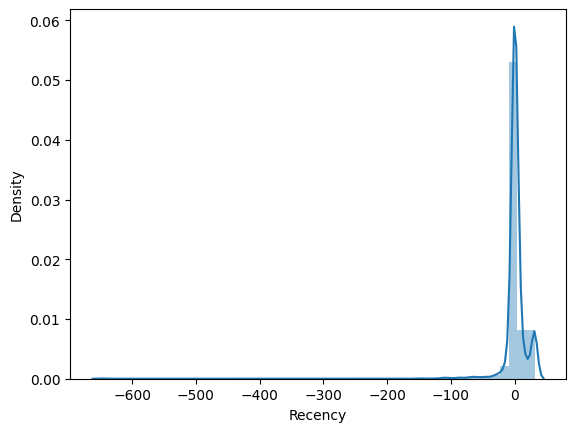

In [13]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [14]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    2000.000000
mean       29.542000
std        76.032892
min      -224.000000
25%        -2.000000
50%         4.000000
75%        44.000000
max       706.000000
Name: Frequency, dtype: float64

<ipython-input-15-477d59aa6898>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




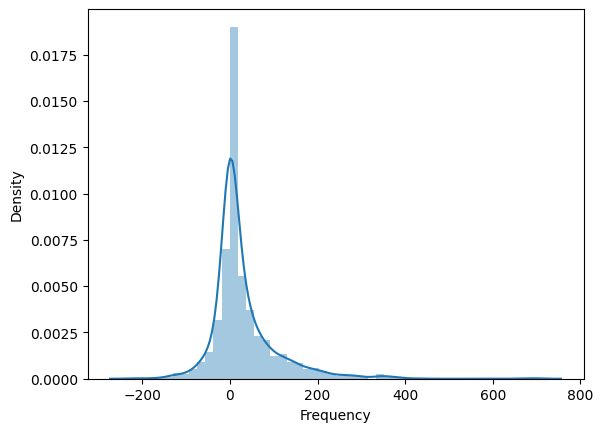

In [15]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')  ['Frequency']

ax = sns.distplot(x)

In [16]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count     2000.000000
mean       103.697000
std       2079.572335
min     -25950.000000
25%        -38.000000
50%          0.000000
75%         44.000000
max      29736.000000
Name: Monetary, dtype: float64

<ipython-input-17-29d9d328ee29>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




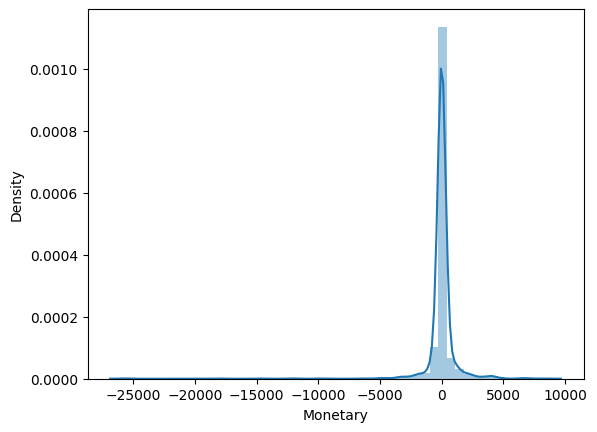

In [17]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [18]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [19]:
quantiles

{'Unnamed: 0': {0.25: 499.75, 0.5: 999.5, 0.75: 1499.25},
 'id': {0.25: 504.75, 0.5: 1007.5, 0.75: 1508.25},
 'antiqueness': {0.25: 10.0, 0.5: 22.0, 0.75: 42.0},
 'churn': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'satisfaction index': {0.25: 48.0, 0.5: 175.0, 0.75: 274.0},
 'number of support cases': {0.25: 0.0, 0.5: 0.0, 0.75: 2.0},
 'customer support priority': {0.25: 0.0, 0.5: 0.0, 0.75: 2.5},
 'Frequency': {0.25: -2.0, 0.5: 4.0, 0.75: 44.0},
 'service use variation': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'Monetary': {0.25: -38.0, 0.5: 0.0, 0.75: 44.0},
 'Recency': {0.25: -1.0, 0.5: 0.0, 0.75: 3.0}}

In [20]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [21]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,Frequency,service use variation,Monetary,Recency,R,F,M
0,0,921,46,0,386,0,0.00,62,8,294,-1,1,1,1
1,1,151,26,0,0,0,0.00,4,0,-8,31,4,3,3
2,2,1650,10,0,282,8,2.75,262,2,0,-1,1,1,3
3,3,1481,12,0,158,0,0.00,-2,2,1174,1,3,4,1
4,4,200,12,0,240,0,0.00,52,0,18,10,4,1,2


In [22]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,Frequency,service use variation,Monetary,Recency,R,F,M,RFMGroup,RFMScore
0,0,921,46,0,386,0,0.00,62,8,294,-1,1,1,1,111,3
1,1,151,26,0,0,0,0.00,4,0,-8,31,4,3,3,433,10
2,2,1650,10,0,282,8,2.75,262,2,0,-1,1,1,3,113,5
3,3,1481,12,0,158,0,0.00,-2,2,1174,1,3,4,1,341,8
4,4,200,12,0,240,0,0.00,52,0,18,10,4,1,2,412,7


In [23]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,index,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,Frequency,service use variation,Monetary,Recency,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,0,921,46,0,386,0,0.00,62,8,294,-1,1,1,1,111,3,Platinum
1,1,1,151,26,0,0,0,0.00,4,0,-8,31,4,3,3,433,10,Bronze
2,2,2,1650,10,0,282,8,2.75,262,2,0,-1,1,1,3,113,5,Platinum
3,3,3,1481,12,0,158,0,0.00,-2,2,1174,1,3,4,1,341,8,Gold
4,4,4,200,12,0,240,0,0.00,52,0,18,10,4,1,2,412,7,Gold


In [24]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,index,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,Frequency,service use variation,Monetary,Recency,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,660,660,357,64,0,364,0,0.0,88,4,16106,-1,1,1,1,111,3,Platinum
1,1511,1511,841,54,0,358,0,0.0,92,0,12188,-1,1,1,1,111,3,Platinum
2,604,604,848,50,0,414,6,2.0,258,4,6924,-1,1,1,1,111,3,Platinum
3,611,611,238,24,0,142,0,0.0,116,0,4228,-1,1,1,1,111,3,Platinum
4,247,247,701,72,0,360,0,0.0,188,0,3822,-1,1,1,1,111,3,Platinum
5,1655,1655,893,50,0,450,2,3.0,154,-86,1246,-1,1,1,1,111,3,Platinum
6,548,548,331,22,0,330,0,0.0,64,0,1192,-2,1,1,1,111,3,Platinum
7,648,648,312,28,0,396,0,0.0,80,0,962,-1,1,1,1,111,3,Platinum
8,1754,1754,976,44,0,266,0,0.0,54,0,934,-4,1,1,1,111,3,Platinum
9,585,585,1470,12,0,292,0,0.0,66,2,794,-1,1,1,1,111,3,Platinum


In [25]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 7.7 MB/s eta 0:00:00


In [26]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)




## K-Means Clustering

In [27]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]
RFMScores['Frequency'] = [handle_neg_n_zero(x) for x in RFMScores.Frequency]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<ipython-input-28-a3998907c46f>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




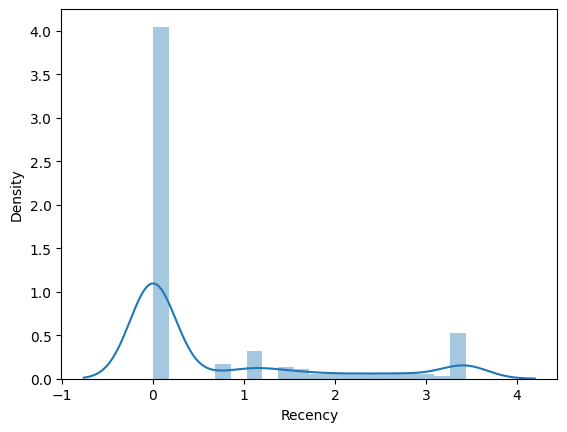

In [28]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

<ipython-input-29-de88ace554c9>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




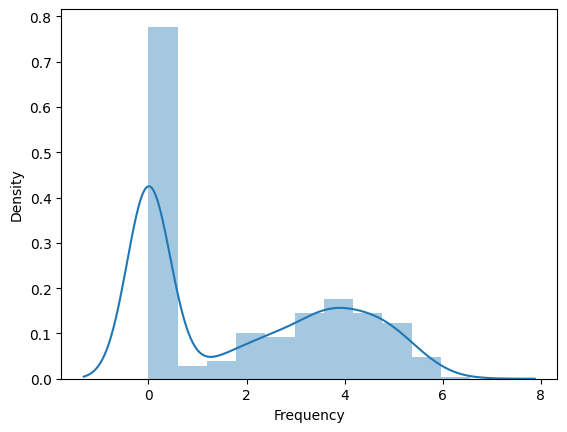

In [29]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

<ipython-input-30-de7c9d814cb2>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




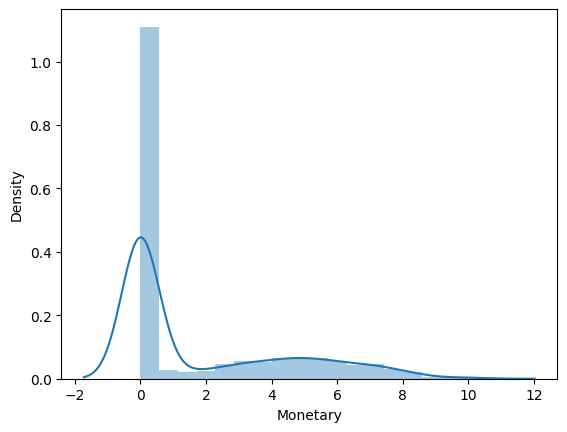

In [30]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [31]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

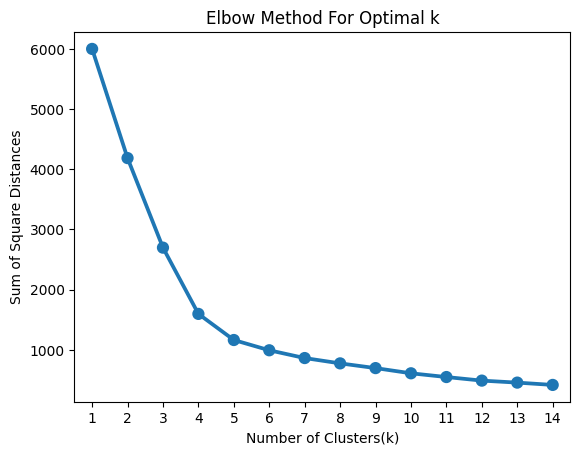

In [32]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,Frequency,service use variation,Monetary,Recency,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,0,921,46,0,386,0,0.00,62,8,294,1,1,1,1,111,3,Platinum,0
1,1,151,26,0,0,0,0.00,4,0,1,31,4,3,3,433,10,Bronze,1
2,2,1650,10,0,282,8,2.75,262,2,1,1,1,1,3,113,5,Platinum,2
3,3,1481,12,0,158,0,0.00,1,2,1174,1,3,4,1,341,8,Gold,0
4,4,200,12,0,240,0,0.00,52,0,18,10,4,1,2,412,7,Gold,1


<Figure size 700x700 with 0 Axes>

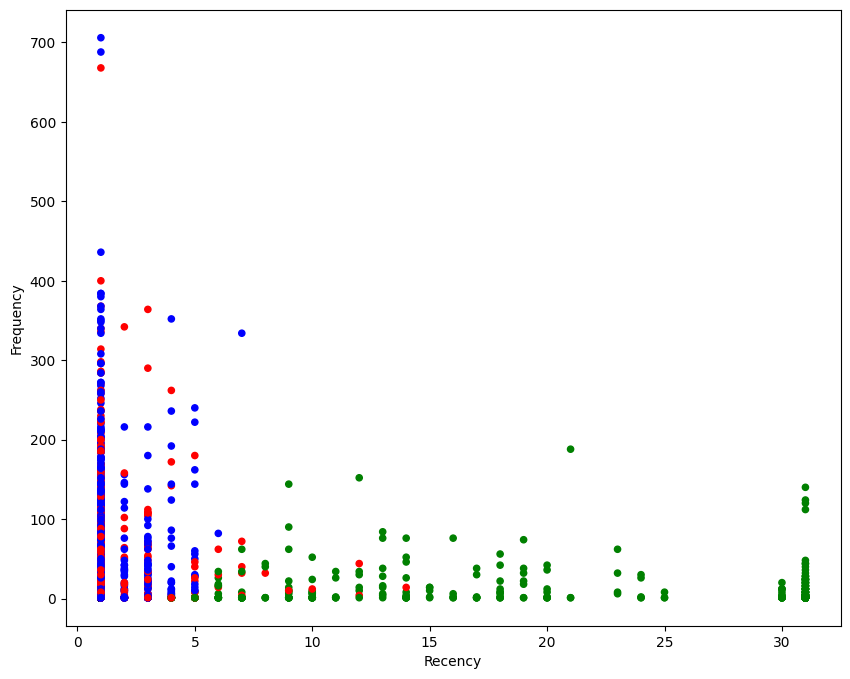

In [34]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(
    kind="scatter",
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)


In [35]:
RFMScores.head()

,Unnamed: 0,id,antiqueness,churn,satisfaction index,number of support cases,customer support priority,Frequency,service use variation,Monetary,Recency,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,0,921,46,0,386,0,0.00,62,8,294,1,1,1,1,111,3,Platinum,0,red
1,1,151,26,0,0,0,0.00,4,0,1,31,4,3,3,433,10,Bronze,1,green
2,2,1650,10,0,282,8,2.75,262,2,1,1,1,1,3,113,5,Platinum,2,blue
3,3,1481,12,0,158,0,0.00,1,2,1174,1,3,4,1,341,8,Gold,0,red
4,4,200,12,0,240,0,0.00,52,0,18,10,4,1,2,412,7,Gold,1,green


In [36]:
profile=RFMScores[['id','RFM_Loyalty_Level']]

In [38]:
profile

,id,RFM_Loyalty_Level
0,921,Platinum
1,151,Bronze
2,1650,Platinum
3,1481,Gold
4,200,Gold
...,...,...
1995,1046,Platinum
1996,1935,Gold
1997,949,Platinum
1998,403,Platinum


In [39]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path = '/content/drive/My Drive/output4.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  profile.to_csv(f)

Mounted at /content/drive
